# Data Sience Project - Task 2  

In [1]:
import pandas as pd
import numpy as np

In [2]:
#load the csv and show
df = pd.read_csv('Hotels_data_Changed.csv', parse_dates=True)
df.head()

,Unnamed: 0,Snapshot ID,Snapshot Date,Checkin Date,Days,Original Price,Discount Price,Discount Code,Available Rooms,Hotel Name,Hotel Stars,DayDiff,WeekDay,DiscountDiff,DiscountPerc
0,0,1,2015-07-17,2015-08-12,5,1178,1040,1,6,Best Western Plus Seaport Inn Downtown,3,26,Wednesday,138,11.714771
1,1,1,2015-07-17,2015-08-19,5,1113,982,1,8,Best Western Plus Seaport Inn Downtown,3,33,Wednesday,131,11.769991
2,2,1,2015-07-17,2015-08-13,5,4370,4240,1,3,The Peninsula New York,5,27,Thursday,130,2.974828
3,3,1,2015-07-17,2015-07-26,5,1739,1667,1,18,Eventi Hotel a Kimpton Hotel,4,9,Sunday,72,4.140311
4,4,1,2015-07-17,2015-08-12,5,1739,1672,1,3,Eventi Hotel a Kimpton Hotel,4,26,Wednesday,67,3.852789


## 2.a

#### groupby to organize the details

In [3]:
grouped_df = df.groupby(['Snapshot Date','Checkin Date','DayDiff','Hotel Name','WeekDay'])

In [4]:
grouped_df['DiscountDiff'].max()

Snapshot Date  Checkin Date  DayDiff  Hotel Name                                                    WeekDay  
2015-07-17     2015-07-18    1        Home2 Suites by Hilton NY Long Island City Manhattan View     Saturday     150
                                      Howard Johnson Inn Queens                                     Saturday      33
                                      Newark Liberty International Airport Marriott                 Saturday     180
                                      Park Hyatt New York                                           Saturday     100
                                      Ramada Staten Island                                          Saturday     150
                                      Renaissance Newark Airport Hotel                              Saturday     200
               2015-07-19    2        Hampton Inn JFK Airport                                       Sunday       120
                                      Hilton New York JFK Airport      

##### Because the groupby first one, does according to the date of the Snapshot Date its hard to understand and use for chack.
##### lets try other options maybe more easier.

#### filter to the dataframe that only the columns that help us to find the max discount

In [5]:
filtered = df.filter(["Hotel Name","DayDiff", "Checkin Date", "Snapshot Date", "WeekDay", "DiscountDiff", "Discount Code"], axis=1)
filtered.head()

,Hotel Name,DayDiff,Checkin Date,Snapshot Date,WeekDay,DiscountDiff,Discount Code
0,Best Western Plus Seaport Inn Downtown,26,2015-08-12,2015-07-17,Wednesday,138,1
1,Best Western Plus Seaport Inn Downtown,33,2015-08-19,2015-07-17,Wednesday,131,1
2,The Peninsula New York,27,2015-08-13,2015-07-17,Thursday,130,1
3,Eventi Hotel a Kimpton Hotel,9,2015-07-26,2015-07-17,Sunday,72,1
4,Eventi Hotel a Kimpton Hotel,26,2015-08-12,2015-07-17,Wednesday,67,1


#### now we try again to do group by with a different order

In [6]:
filtered["MaxDiscount"] = filtered.groupby(["Hotel Name","DayDiff", "Checkin Date", "Snapshot Date", "WeekDay"])["DiscountDiff"].transform('max')

In [7]:
filtered.head(15)

,Hotel Name,DayDiff,Checkin Date,Snapshot Date,WeekDay,DiscountDiff,Discount Code,MaxDiscount
0,Best Western Plus Seaport Inn Downtown,26,2015-08-12,2015-07-17,Wednesday,138,1,138
1,Best Western Plus Seaport Inn Downtown,33,2015-08-19,2015-07-17,Wednesday,131,1,131
2,The Peninsula New York,27,2015-08-13,2015-07-17,Thursday,130,1,230
3,Eventi Hotel a Kimpton Hotel,9,2015-07-26,2015-07-17,Sunday,72,1,72
4,Eventi Hotel a Kimpton Hotel,26,2015-08-12,2015-07-17,Wednesday,67,1,141
5,Grand Hyatt New York,21,2015-08-07,2015-07-17,Friday,91,1,91
6,Grand Hyatt New York,23,2015-08-09,2015-07-17,Sunday,91,1,91
7,Grand Hyatt New York,26,2015-08-12,2015-07-17,Wednesday,73,1,73
8,Grand Hyatt New York,27,2015-08-13,2015-07-17,Thursday,55,1,127
9,Hilton New York Fashion District,5,2015-07-22,2015-07-17,Wednesday,200,1,200


In [8]:
#we have a duplicates values , we need the values be currect ,so we need remove them from the table
grouped = filtered[filtered["DiscountDiff"]==filtered["MaxDiscount"]].drop_duplicates(["Hotel Name","DayDiff", "Checkin Date", "Snapshot Date", "WeekDay"])
grouped.head()

,Hotel Name,DayDiff,Checkin Date,Snapshot Date,WeekDay,DiscountDiff,Discount Code,MaxDiscount
0,Best Western Plus Seaport Inn Downtown,26,2015-08-12,2015-07-17,Wednesday,138,1,138
1,Best Western Plus Seaport Inn Downtown,33,2015-08-19,2015-07-17,Wednesday,131,1,131
3,Eventi Hotel a Kimpton Hotel,9,2015-07-26,2015-07-17,Sunday,72,1,72
5,Grand Hyatt New York,21,2015-08-07,2015-07-17,Friday,91,1,91
6,Grand Hyatt New York,23,2015-08-09,2015-07-17,Sunday,91,1,91


In [9]:
#now we need to remove the columns thats halpes us , from now we use only in discount code(class)
grouped.drop(labels=["MaxDiscount","DiscountDiff"], axis=1,inplace=True)
grouped.head()

,Hotel Name,DayDiff,Checkin Date,Snapshot Date,WeekDay,Discount Code
0,Best Western Plus Seaport Inn Downtown,26,2015-08-12,2015-07-17,Wednesday,1
1,Best Western Plus Seaport Inn Downtown,33,2015-08-19,2015-07-17,Wednesday,1
3,Eventi Hotel a Kimpton Hotel,9,2015-07-26,2015-07-17,Sunday,1
5,Grand Hyatt New York,21,2015-08-07,2015-07-17,Friday,1
6,Grand Hyatt New York,23,2015-08-09,2015-07-17,Sunday,1


#### Save df to csv

In [10]:
grouped.to_csv("Hotels_data_best_discount.csv")

## 2.b

In [11]:
new_df=grouped.copy()

In [12]:
#check if is the same.
new_df.head()

,Hotel Name,DayDiff,Checkin Date,Snapshot Date,WeekDay,Discount Code
0,Best Western Plus Seaport Inn Downtown,26,2015-08-12,2015-07-17,Wednesday,1
1,Best Western Plus Seaport Inn Downtown,33,2015-08-19,2015-07-17,Wednesday,1
3,Eventi Hotel a Kimpton Hotel,9,2015-07-26,2015-07-17,Sunday,1
5,Grand Hyatt New York,21,2015-08-07,2015-07-17,Friday,1
6,Grand Hyatt New York,23,2015-08-09,2015-07-17,Sunday,1


## pre process

In [13]:
from sklearn.preprocessing import LabelEncoder

#### for fit will work - convert columns to categorial numbers instead of strings

In [14]:
lb_make = LabelEncoder()
new_df["Snapshot Date"] = lb_make.fit_transform(new_df["Snapshot Date"])
new_df["Checkin Date"] = lb_make.fit_transform(new_df["Checkin Date"])
new_df["Hotel Name"] = lb_make.fit_transform(new_df["Hotel Name"])
new_df["WeekDay"] = lb_make.fit_transform(new_df["WeekDay"])
new_df=new_df[['Snapshot Date','Checkin Date','DayDiff','Hotel Name','WeekDay','Discount Code']].dropna(axis=0, how='any')

In [15]:
new_df.head()

,Snapshot Date,Checkin Date,DayDiff,Hotel Name,WeekDay,Discount Code
0,0,25,26,35,6,1
1,0,32,33,35,6,1
3,0,8,9,127,3,1
5,0,20,21,163,0,1
6,0,22,23,163,3,1


## split train and test

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
# Split dataset in training and test datasets
used_features =['Snapshot Date','Checkin Date','DayDiff','Hotel Name','WeekDay']
features = new_df[used_features]
classes = new_df['Discount Code']
X_train, X_test, Y_train, Y_test = train_test_split(features,classes, test_size=0.3)

## Naive Bayes

In [20]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

In [21]:
# Instantiate the classifier
gnb = GaussianNB()
# Train classifier
gnb.fit(
    X_train,
    Y_train
)

GaussianNB(priors=None, var_smoothing=1e-09)

#### accuracy:

In [22]:
expected = Y_test
predicted = gnb.predict(X_test)
accuracy_score(expected,predicted)

0.31559490525007766

#### confusion matrix and reports:

In [23]:
from sklearn import metrics
print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))

              precision    recall  f1-score   support

           1       0.31      0.08      0.13      8357
           2       0.32      0.75      0.44     10199
           3       0.32      0.21      0.25      8671
           4       0.00      0.00      0.00      4963

   micro avg       0.32      0.32      0.32     32190
   macro avg       0.24      0.26      0.21     32190
weighted avg       0.27      0.32      0.24     32190

[[ 694 6502 1161    0]
 [ 707 7649 1843    0]
 [ 524 6331 1816    0]
 [ 300 3796  867    0]]


C:\Users\Shir Levy\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Shir Levy\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Shir Levy\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [24]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):


    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

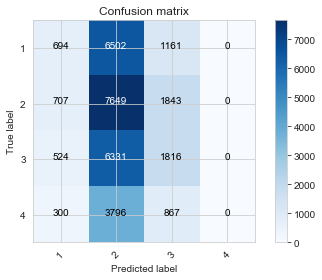

In [25]:
plt.figure()
plot_confusion_matrix(metrics.confusion_matrix(expected, predicted), classes.unique(),
                       title='Confusion matrix')

In [26]:
gnb.predict([[0,25,26,35,6]])[0]

1

## An attempt to improve the accuracy

#### lets see what happend if we removed one or more featers (we tried all the Variations) , if its will help or not.

In [27]:
# Split dataset again in training and test datasets without dayDiff
used_features1 =['Snapshot Date','Checkin Date','Hotel Name','WeekDay']
features1 = new_df[used_features1]
X_train1, X_test1, Y_train1, Y_test1 = train_test_split(features1,classes, test_size=0.3)

In [28]:
from sklearn.naive_bayes import GaussianNB
# Instantiate the classifier
gnb = GaussianNB()
# Train classifier
gnb.fit(
    X_train1,
    Y_train1
)

GaussianNB(priors=None, var_smoothing=1e-09)

#### now the accuracy :

In [29]:
expected1 = Y_test1
predicted1 = gnb.predict(X_test1)
accuracy_score(expected1,predicted1)

0.30950605778191986

#### As you can see nothing has changed, has not helped

#### we found that there is a problem of imbalnce classes and decided to take same size date each class

In [30]:
C1=new_df[new_df['Discount Code']==1].count()
C2=new_df[new_df['Discount Code']==2].count()
C3=new_df[new_df['Discount Code']==3].count()
C4=new_df[new_df['Discount Code']==4].count()
print("c1:",C1)
print("c2:",C2)
print("c3:",C3)
print("c4:",C4)

c1: Snapshot Date    27899
Checkin Date     27899
DayDiff          27899
Hotel Name       27899
WeekDay          27899
Discount Code    27899
dtype: int64
c2: Snapshot Date    34040
Checkin Date     34040
DayDiff          34040
Hotel Name       34040
WeekDay          34040
Discount Code    34040
dtype: int64
c3: Snapshot Date    28835
Checkin Date     28835
DayDiff          28835
Hotel Name       28835
WeekDay          28835
Discount Code    28835
dtype: int64
c4: Snapshot Date    16525
Checkin Date     16525
DayDiff          16525
Hotel Name       16525
WeekDay          16525
Discount Code    16525
dtype: int64


In [58]:
# 16525 is the min number of rows in all the classes
Class1=new_df[new_df['Discount Code']==1].head(16525)
Class2=new_df[new_df['Discount Code']==2].head(16525)
Class3=new_df[new_df['Discount Code']==3].head(16525)
Class4=new_df[new_df['Discount Code']==4].head(16525)

In [32]:
Class1=Class1.append(Class2)
Class1=Class1.append(Class3)
Class1=Class1.append(Class4)

In [33]:
Class1.tail()

,Snapshot Date,Checkin Date,DayDiff,Hotel Name,WeekDay,Discount Code
187837,27,51,23,314,1,4
187841,27,40,12,47,4,4
187844,27,48,20,445,0,4
187845,27,33,5,273,4,4
187846,27,46,18,273,6,4


In [34]:
df_same=Class1.copy();

In [35]:
df_same.drop(labels=["Discount Code"],axis=1, inplace=True)

In [36]:
df_same.head()

,Snapshot Date,Checkin Date,DayDiff,Hotel Name,WeekDay
0,0,25,26,35,6
1,0,32,33,35,6
3,0,8,9,127,3
5,0,20,21,163,0
6,0,22,23,163,3


In [37]:
df_same.describe()

,Snapshot Date,Checkin Date,DayDiff,Hotel Name,WeekDay
count,66100.000000,66100.000000,66100.000000,66100.000000,66100.000000
mean,57.621180,77.987216,17.764539,279.912890,3.151740
std,32.115027,36.021168,9.921202,147.022605,2.078018
min,0.000000,0.000000,1.000000,0.000000,0.000000
25%,34.000000,51.000000,9.000000,173.000000,1.000000
50%,59.000000,79.000000,18.000000,272.000000,3.000000
75%,80.000000,103.000000,26.000000,387.000000,5.000000
max,150.000000,201.000000,34.000000,553.000000,6.000000


#### we can see here that mean is approxmetly  as median (50%) so its probably noraml distribution

In [38]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(df_same, Class1['Discount Code'], test_size=0.3,random_state=0) 

In [39]:
X_train2, X_test2, y_train2, y_test2

(        Snapshot Date  Checkin Date  DayDiff  Hotel Name  WeekDay
 138069            117           155       33         113        3
 49737              13            28       16         514        2
 185607              4            30       27         408        1
 54401              60            92       30         176        3
 28511              46            71       23         111        3
 86925              82            95        9         194        6
 45173              11            44       34          86        1
 103533             93           107       10         351        1
 22595              42            53       10         188        6
 106585             96           121       21         397        1
 134465            114           134       15         191        3
 20566              41            43        1         180        3
 13480              36            66       29         420        5
 90821              85           107       18         141     

In [40]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train2, y_train2)
pred = gnb.predict(X_test2)

In [41]:
accuracy_score(y_test2,pred)

0.33530005042864347

In [42]:
from sklearn import metrics
print(metrics.classification_report(y_test2,pred))
print(metrics.confusion_matrix(y_test2,pred))

              precision    recall  f1-score   support

           1       0.27      0.14      0.18      4925
           2       0.29      0.56      0.38      4917
           3       0.31      0.21      0.25      4938
           4       0.48      0.43      0.45      5050

   micro avg       0.34      0.34      0.34     19830
   macro avg       0.34      0.33      0.32     19830
weighted avg       0.34      0.34      0.32     19830

[[ 680 2449  741 1055]
 [ 745 2757 1053  362]
 [ 613 2367 1044  914]
 [ 466 1888  528 2168]]


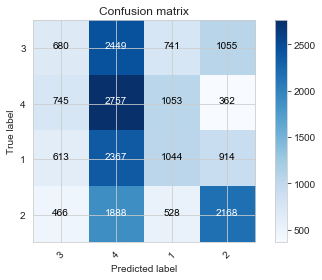

In [43]:
plt.figure()
plot_confusion_matrix(metrics.confusion_matrix(y_test2,pred), y_test2.unique(),
                       title='Confusion matrix')

In [44]:
gnb.predict([[0,25,26,35,6]])[0]

2

In [55]:
cm=metrics.confusion_matrix(y_test2,pred)

FP = cm.sum(axis=0) - np.diag(cm)  # foreach class: sum prediction - TP
FN = cm.sum(axis=1) - np.diag(cm)  # foreach class: sum actuals - TP
TP = np.diag(cm)
TN = cm.sum() - (FP + FN + TP)

FP = FP.astype(float)
FN = FN.astype(float)
TP = TP.astype(float)
TN = TN.astype(float)

def printRates(array, stat):
    print("%s for classes:" %stat)
    for i in range(len(array)):
        print("\tclass %d = %f" %(i+1, array[i]))
    print("")
    
printRates(FP, "FP")
printRates(FN, "FN")
printRates(TP, "TP")
printRates(TN, "TN")

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
printRates(TPR, "TPR")

# Fall out or false positive rate
FPR = FP/(FP+TN)
printRates(FPR, "FPR")

# Overall accuracy
ACC = (TP+TN)/(TP+FP+FN+TN)
printRates(ACC, "ACC")

FP for classes:
	class 1 = 1824.000000
	class 2 = 6704.000000
	class 3 = 2322.000000
	class 4 = 2331.000000

FN for classes:
	class 1 = 4245.000000
	class 2 = 2160.000000
	class 3 = 3894.000000
	class 4 = 2882.000000

TP for classes:
	class 1 = 680.000000
	class 2 = 2757.000000
	class 3 = 1044.000000
	class 4 = 2168.000000

TN for classes:
	class 1 = 13081.000000
	class 2 = 8209.000000
	class 3 = 12570.000000
	class 4 = 12449.000000

TPR for classes:
	class 1 = 0.138071
	class 2 = 0.560708
	class 3 = 0.211422
	class 4 = 0.429307

FPR for classes:
	class 1 = 0.122375
	class 2 = 0.449541
	class 3 = 0.155923
	class 4 = 0.157713

ACC for classes:
	class 1 = 0.693949
	class 2 = 0.553001
	class 3 = 0.686536
	class 4 = 0.737115



## Decision tree

In [46]:
from sklearn import tree

In [47]:
dt_classifier = tree.DecisionTreeClassifier()
dt_classifier = dt_classifier.fit(X_train2, y_train2)

In [48]:
expected = y_test2
predicted = dt_classifier.predict(X_test2)

In [49]:
print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))

              precision    recall  f1-score   support

           1       0.78      0.77      0.78      4925
           2       0.77      0.78      0.77      4917
           3       0.77      0.77      0.77      4938
           4       0.83      0.83      0.83      5050

   micro avg       0.79      0.79      0.79     19830
   macro avg       0.79      0.79      0.79     19830
weighted avg       0.79      0.79      0.79     19830

[[3806  453  358  308]
 [ 416 3842  427  232]
 [ 384  451 3779  324]
 [ 255  256  338 4201]]


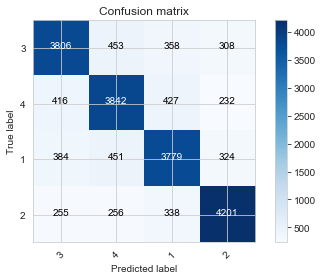

In [50]:
plt.figure()
plot_confusion_matrix(metrics.confusion_matrix(expected,predicted), expected.unique(),
                       title='Confusion matrix')

In [51]:
accuracy_score(expected,predicted)

0.7880988401412002

In [52]:
dt_classifier.predict([[0,25,26,35,6]])[0]

1

In [56]:
cm = confusion_matrix(expected,predicted)


FP = cm.sum(axis=0) - np.diag(cm) 
FN = cm.sum(axis=1) - np.diag(cm)  
TP = np.diag(cm)
TN = cm.sum() - (FP + FN + TP)

FP = FP.astype(float)
FN = FN.astype(float)
TP = TP.astype(float)
TN = TN.astype(float)

printRates(FP, "FP")
printRates(FN, "FN")
printRates(TP, "TP")
printRates(TN, "TN")

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
printRates(TPR, "TPR")

# Fall out or false positive rate
FPR = FP/(FP+TN)
printRates(FPR, "FPR")

# Overall accuracy
ACC = (TP+TN)/(TP+FP+FN+TN)
printRates(ACC, "ACC")

FP for classes:
	class 1 = 1055.000000
	class 2 = 1160.000000
	class 3 = 1123.000000
	class 4 = 864.000000

FN for classes:
	class 1 = 1119.000000
	class 2 = 1075.000000
	class 3 = 1159.000000
	class 4 = 849.000000

TP for classes:
	class 1 = 3806.000000
	class 2 = 3842.000000
	class 3 = 3779.000000
	class 4 = 4201.000000

TN for classes:
	class 1 = 13850.000000
	class 2 = 13753.000000
	class 3 = 13769.000000
	class 4 = 13916.000000

TPR for classes:
	class 1 = 0.772792
	class 2 = 0.781371
	class 3 = 0.765290
	class 4 = 0.831881

FPR for classes:
	class 1 = 0.070782
	class 2 = 0.077784
	class 3 = 0.075410
	class 4 = 0.058457

ACC for classes:
	class 1 = 0.890368
	class 2 = 0.887292
	class 3 = 0.884922
	class 4 = 0.913616



## ROC

Naive Bayes


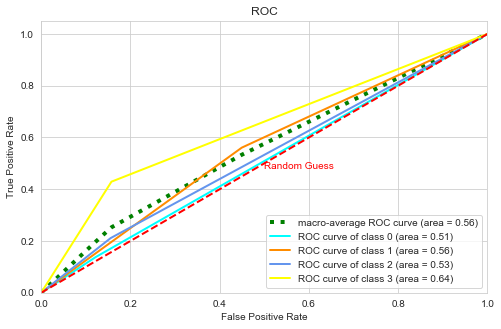

Decision Tree


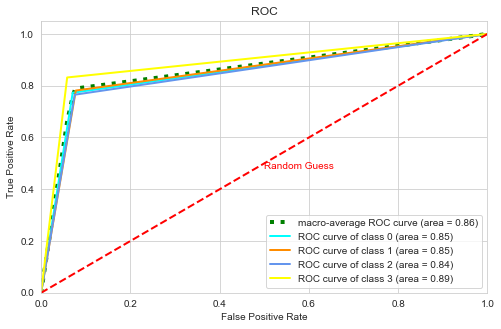

In [54]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve,auc
from scipy import interp
%matplotlib inline

def PlotRoc(classifier_type, pred,n_classes):
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(np.array(pd.get_dummies(y_test2))[:, i], np.array(pd.get_dummies(pred))[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])


    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

    mean_tpr = np.zeros_like(all_fpr)
    for i in range(n_classes):
        mean_tpr += interp(all_fpr, fpr[i], tpr[i])

    mean_tpr /= n_classes

    fpr["macro"] = all_fpr
    tpr["macro"] = mean_tpr
    roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

    lw=2
    plt.figure(figsize=(8,5))
    plt.plot(fpr["macro"], tpr["macro"],
             label='macro-average ROC curve (area = {0:0.2f})'
                   ''.format(roc_auc["macro"]),
             color='green', linestyle=':', linewidth=4)

    colors = ['aqua', 'darkorange', 'cornflowerblue', 'yellow']
    for i, color in zip(range(n_classes), colors):
        plt.plot(fpr[i], tpr[i], color=color, lw=lw,
                 label='ROC curve of class {0} (area = {1:0.2f})'
                 ''.format(i, roc_auc[i]))

    plt.plot([0, 1], [0, 1], 'k--',color='red', lw=lw)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.annotate('Random Guess',(.5,.48),color='red')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC')
    plt.legend(loc="lower right")
    plt.show()
    

print("Naive Bayes")
PlotRoc("Naive Bayes", pred,4)
print("Decision Tree")
PlotRoc("Decision Tree", predicted,4)

## The differences between the 2 Algorithems
 As the results show, we see that the decision tree Algorithem is highly superior than the Naive Bayes Algorithm in this case.

 The Naive Bayes Algorithem is based on the Bayes law in statistics. The Algorithm is considered to be much easier to implement than the decision tree, and generic for many different cases. It does however strongly relies on the fact the the different parameters are independent from each other - as in there is no correlation between them. In this case, there are a few parameters that have a strong binding between them (WeekDay and Checkin Date for example), and that is probably the reason why the decision algorithem gave us much better results.

The main disadvantege of the decision tree algorithem, is that it tends to overfit that data - as in the classifier has such a strong structure from the test data, that a new piece of information unknown to it might cause it to give incorrect results. this can be handled by pruning.